In [1]:
import csv
from matplotlib import pyplot as plt
import numpy as np
from math import ceil
import sys
sys.path.append('../config')
from HelperFunctions import printdict, ColourMap, NameMap

In [2]:
results_by_col = {}
results_by_p = {}
results_by_p_physics = {}
Colours = set()
Particles = set()
with open('../data/Particolours_example.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for x,row in enumerate(reader):
        results_by_col[x] = {}
        for key in row.keys():
            if key == 'Timestamp':
                results_by_col[x]['timestamp'] = row[key]
            elif key == '(Optional) Are you a particle physicist?':
                results_by_col[x]['physYN'] = row[key]
            else:
                colour = key.split('[')[-1].split(']')[0]
                Colours.add(colour.lower())
                if "particles" in key:
                    results_by_col[x]["p_"+colour.lower()] = row[key]
                elif "quarks" in key:
                    results_by_col[x]["q_"+colour.lower()] = row[key]
        
        for key, val in results_by_col[x].items():
            if key in ['timestamp','physYN']:
                if key not in results_by_p.keys():
                    results_by_p[key] = []
                    results_by_p_physics[key] = []
                results_by_p[key].append(results_by_col[x][key])
                if results_by_col[x]['physYN'] == "Yes":
                    results_by_p_physics[key].append(results_by_col[x][key])
            elif val != '':
                if val not in results_by_p.keys():
                    Particles.add(val)
                    results_by_p[val] = []
                    results_by_p_physics[val] = []
                if results_by_col[x]['physYN'] == "Yes":
                    results_by_p_physics[val].append(key.split("_")[-1])
                results_by_p[val].append(key.split("_")[-1])
                
    for key, val in results_by_p_physics.items():
        print(key,':',val)
        print(len(val))

timestamp : ['2022/12/03 12:48:06 pm GMT', '2022/12/09 4:24:21 pm GMT', '2022/12/09 4:34:16 pm GMT', '2022/12/09 4:38:14 pm GMT', '2022/12/09 4:38:15 pm GMT', '2022/12/09 4:40:37 pm GMT', '2022/12/09 5:19:28 pm GMT', '2022/12/09 6:01:21 pm GMT', '2022/12/09 6:04:16 pm GMT', '2022/12/09 6:24:10 pm GMT', '2022/12/10 11:55:54 am GMT', '2022/12/10 2:09:15 pm GMT']
12
Muon : ['red', 'brown', 'red', 'orange', 'brown', 'purple', 'orange', 'orange', 'blue', 'purple', 'orange', 'purple']
12
Electron : ['green', 'yellow', 'green', 'yellow', 'yellow', 'orange', 'yellow', 'green', 'red', 'blue', 'red', 'yellow']
12
Proton : ['blue', 'red', 'blue', 'red', 'blue', 'red', 'red', 'red', 'purple', 'gold', 'blue', 'red']
12
Z boson : ['orange', 'orange', 'black', 'silver', 'orange', 'white', 'purple', 'white', 'gold', 'white', 'purple']
11
Higgs boson : ['purple', 'magenta', 'yellow', 'grey', 'silver', 'pink', 'white', 'magenta', 'beige', 'black', 'gold']
11
Tau lepton : ['brown', 'beige', 'cyan', 'gold

In [3]:
#print(results_by_col[0])
print(list(Colours))
print(list(Particles))

['purple', 'black', 'white', 'magenta', 'red', 'orange', 'yellow', 'silver', 'green', 'grey', 'beige', 'brown', 'pink', 'cyan', 'colourless', 'blue', 'gold']
['Muon', 'Higgs boson', 'Top quark', 'Strange quark', 'Neutron', 'Down quark', 'Up quark', 'Electron', 'W boson(s)', 'Bottom quark', 'Tau lepton', 'Proton', 'Z boson', 'Charm quark']


## First plot a colour pie chart for each particle

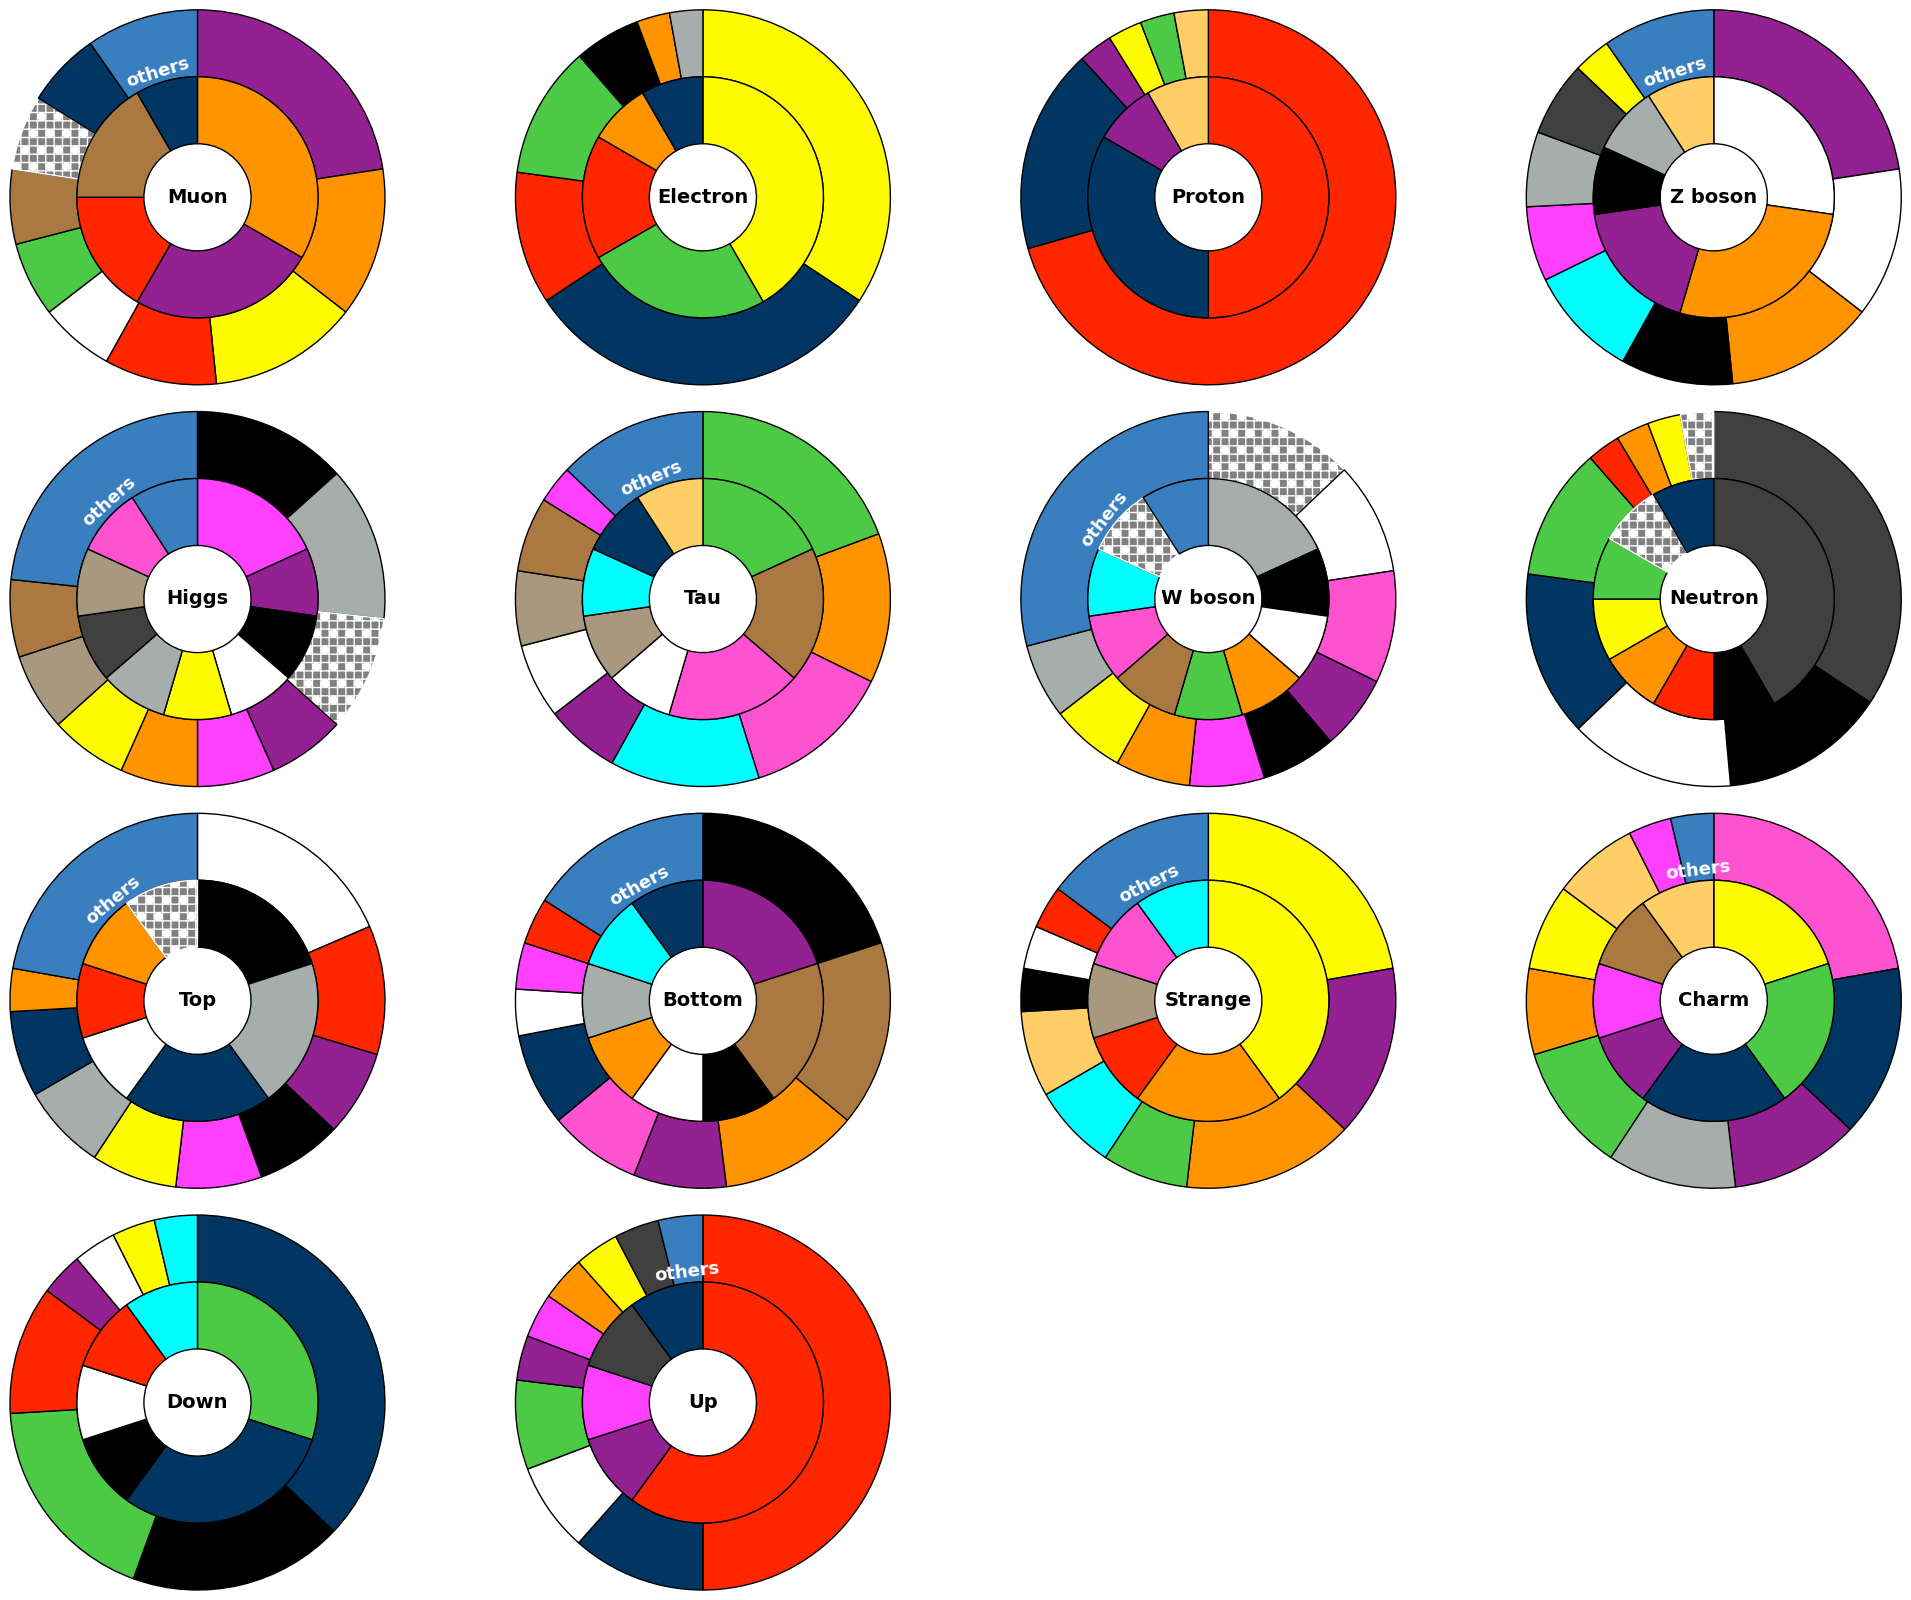

In [4]:
max_slices = 10
Ncols = len(Colours)
Nparticles = len(Particles)
Ncolumns = 4
Nrows = ceil(Nparticles/Ncolumns)
pos_index = range(1,Nparticles + 1)
fig = plt.figure(1,(25,20))
index=0
test = {}
test["Proton"] = results_by_p_physics["Proton"]
test["Strange quark"] = results_by_p_physics["Strange quark"]

#for particle,results in test.items():
for particle,results in results_by_p.items():
    if particle in ['timestamp','physYN']:
        continue
    max_col = []
    plot_values = {}
    others = []
    max_val = 0
    for x,col in enumerate(Colours):
        tmp_num = sum(r == col for r in results)
        if tmp_num > 0:
            plot_values[col] = tmp_num
            others.append(tmp_num)
            
    others.sort(reverse=True)
    plot_colours = list(dict(sorted(plot_values.items(), key=lambda x:x[1],reverse=True)).keys()) #Yuck
    n_max = sum(v == others[0] for v in others)
    other_tot = 0
    labels = []
    sizes = []
    colour_labels=[]
    for x,num in enumerate(others):
        if x < max_slices-1:
            lab = plot_colours[x]
            colour_labels.append(ColourMap[lab])
            if lab == "colourless":
                labels.append(lab)
            else:
                labels.append("")
            sizes.append(num)
        else:
            other_tot = other_tot + num
    if other_tot > 0:
        labels.append("others")
        sizes.append(other_tot)
        colour_labels.append(ColourMap["others"])
    explode = np.zeros(len(labels))
    for i in range(n_max):
        explode[i] = 0.1
    ax = fig.add_subplot(Nrows,Ncolumns,pos_index[index])
    wedges_lst, labels_lst = ax.pie(sizes, labels=labels, colors=colour_labels, rotatelabels=True,\
                                    radius=1.4, wedgeprops=dict(width=0.5, edgecolor='white'), textprops={"fontsize": 13, "fontweight": 'bold'},\
                                    labeldistance=0.7, startangle=90, counterclock=False)
    rot = 0
    for x,lab in enumerate(labels_lst):
        nam = lab.get_text()
        rot = lab.get_rotation()
        if 270 <= rot < 360: #top-left and bottom right
            rot = rot+90
        elif 0 < rot <= 90: #bottomn left and top right
            rot = rot-90
        if nam == "others":
            lab.update({"color": 'w', "rotation": rot, "horizontalalignment": "center", "verticalalignment": "center"})
            wedges_lst[x].set_edgecolor("black")
        elif nam == "colourless":
            lab.update({"text": "", "color": 'r', "rotation": rot, "horizontalalignment": "center", "verticalalignment": "center"})
            wedges_lst[x].set_hatch('++o.')
            wedges_lst[x].set_facecolor('grey')
            #wedges_lst[x].set_edgecolor("black")  
        else:
            lab.update({"rotation": rot, "horizontalalignment": "center", "verticalalignment": "center"})
            wedges_lst[x].set_edgecolor("black")

    index=index+1

    
index=0
for particle,results in results_by_p_physics.items():
    if particle in ['timestamp','physYN']:
        continue
    max_col = []
    plot_values = {}
    others = []
    max_val = 0
    for x,col in enumerate(Colours):
        tmp_num = sum(r == col for r in results)
        if tmp_num > 0:
            plot_values[col] = tmp_num
            others.append(tmp_num)
            
    others.sort(reverse=True)
    plot_colours = list(dict(sorted(plot_values.items(), key=lambda x:x[1],reverse=True)).keys()) #Yuck
    n_max = sum(v == others[0] for v in others)
    other_tot = 0
    labels = []
    sizes = []
    colour_labels=[]
    for x,num in enumerate(others):
        if x < max_slices-1:
            lab = plot_colours[x]
            colour_labels.append(ColourMap[lab])
            if lab == "colourless":
                labels.append(lab)
            else:
                labels.append("")
            sizes.append(num)
        else:
            other_tot = other_tot + num
    if other_tot > 0:
        labels.append("")
        sizes.append(other_tot)
        colour_labels.append(ColourMap["others"])
    explode = np.zeros(len(labels))
    for i in range(n_max):
        explode[i] = 0.1
    ax = fig.add_subplot(Nrows,Ncolumns,pos_index[index])
    wedges_lst, labels_lst = ax.pie(sizes, labels=labels, colors=colour_labels, rotatelabels=True,\
                                    radius=0.9, wedgeprops=dict(width=0.5, edgecolor='white'), textprops={"fontsize": 13, "fontweight": 'bold'},\
                                    labeldistance=0.7, startangle=90, counterclock=False)
    rot = 0
    for x,lab in enumerate(labels_lst):
        nam = lab.get_text()
        rot = lab.get_rotation()
        if 270 <= rot < 360: #top-left and bottom right
            rot = rot+90
        elif 0 < rot <= 90: #bottomn left and top right
            rot = rot-90
        if nam == "others":
            lab.update({"color": 'w', "rotation": rot, "horizontalalignment": "center", "verticalalignment": "center"})
            wedges_lst[x].set_edgecolor("black")
        elif nam == "colourless":
            lab.update({"text": "", "color": 'r', "rotation": rot, "horizontalalignment": "center", "verticalalignment": "center"})
            wedges_lst[x].set_hatch('++o.')
            wedges_lst[x].set_facecolor('grey')
            #wedges_lst[x].set_edgecolor("black")  
        else:
            lab.update({"rotation": rot, "horizontalalignment": "center", "verticalalignment": "center"})
            wedges_lst[x].set_edgecolor("black")
    index=index+1
    ax.set(aspect="equal")
    ax.set_title(NameMap[particle], size=14, weight='bold', y=0.485, pad=0.0)
    
plt.show()

In [257]:
print(Particles)

{'Higgs boson', 'W boson(s)', 'Bottom quark', 'Charm quark', 'Top quark', 'Up quark', 'Tau lepton', 'Strange quark', 'Proton', 'Z boson', 'Muon', 'Electron', 'Neutron', 'Down quark'}
